## <center>Домашнее задание № 10?</center>

#### Домашнее задание
<div class="alert alert-block alert-info">

1. Загрузка и предварительный анализ данных. 
2. EDA.
3. Моделирование.
4. Оценка важности предикторов.
</div>

In [2]:
import numpy as np
import pandas as pd

import csv 
import pandas_profiling

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 80)

import re
from scipy import stats
from scipy.stats import normaltest, norm

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import QuantileTransformer

import category_encoders as ce

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Загрузка и предварительный анализ данных

In [3]:
with open('MFOcredit.csv') as file:
    reader = csv.reader(file)
    for i,row in enumerate(reader):
        print(row)
        if(i >= 3):
            break

['id;date_start;date_end;gender;age;auto;housing;marstatus;regclient;jobtype;region;credits;children;delinq60plus']
['1;03-Jan-2013;12-Jan-2013;Мужской;44;Нет;Собственное;Гражданский брак/женат/замужем;Нет;Официальное;Новосибирская область;Нет;Да;Нет']
['2;03-Jan-2013;17-Jan-2013;Мужской;21;Пропуск поля;Живут с родителями;Холост;Нет;Официальное;Кемеровская область юг;Да;Нет;Нет']
['3;03-Jan-2013;17-Jan-2013;Мужской;25;Пропуск поля;Собственное;Холост;Да;Официальное;Кемеровская область север;Пропуск поля;Нет;Нет']


In [4]:
raw_df = pd.read_csv('MFOcredit.csv', sep=';', encoding="cp1251", nrows=3,
                    parse_dates=True)
raw_df

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет


In [5]:
raw_df

,id,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,1,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,2,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,3,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет


In [6]:
# Извлечение списка столбцов
col_list = raw_df.columns.tolist()
print(col_list)

['id', 'date_start', 'date_end', 'gender', 'age', 'auto', 'housing', 'marstatus', 'regclient', 'jobtype', 'region', 'credits', 'children', 'delinq60plus']


In [7]:
# Переменная 'id' не нужна
my_cols = col_list[1:]

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3 non-null      int64 
 1   date_start    3 non-null      object
 2   date_end      3 non-null      object
 3   gender        3 non-null      object
 4   age           3 non-null      int64 
 5   auto          3 non-null      object
 6   housing       3 non-null      object
 7   marstatus     3 non-null      object
 8   regclient     3 non-null      object
 9   jobtype       3 non-null      object
 10  region        3 non-null      object
 11  credits       3 non-null      object
 12  children      3 non-null      object
 13  delinq60plus  3 non-null      object
dtypes: int64(2), object(12)
memory usage: 464.0+ bytes


In [9]:
my_dtype_cat = {"date_start": object, "date_end": object, 
            "gender": 'category', "age": int, "auto": 'category', 
            "marstatus": 'category', "regclient": 'category', 
            "housing": 'category', "jobtype": 'category',  
            "region": 'category', "credits": 'category',
            "children": 'category', "delinq60plus": object}

In [10]:
df = pd.read_csv('MFOcredit.csv', dtype=my_dtype_cat, sep=';',
                 usecols = my_cols, encoding='cp1251', parse_dates=True)
df.head()

,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,Нет
1,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,Нет
2,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,Нет
3,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,Нет
4,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,Нет


В отдельном отчете `profile_report.html` представлены основные характеристики набора данных.

In [11]:
print(df.shape)

(35212, 13)


In [12]:
%%time
#report = pandas_profiling.ProfileReport(df)
#report.to_file('profile_report_.html') 

Wall time: 0 ns


In [13]:
#report.to_file('profile_report_.html') 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date_start    35212 non-null  object  
 1   date_end      35212 non-null  object  
 2   gender        35212 non-null  category
 3   age           35212 non-null  int32   
 4   auto          35212 non-null  category
 5   housing       35212 non-null  category
 6   marstatus     35212 non-null  category
 7   regclient     35212 non-null  category
 8   jobtype       35212 non-null  category
 9   region        35212 non-null  category
 10  credits       35212 non-null  category
 11  children      35212 non-null  category
 12  delinq60plus  35212 non-null  object  
dtypes: category(9), int32(1), object(3)
memory usage: 1.2+ MB


In [15]:
df.shape

(35212, 13)

In [16]:
df.isnull().sum()

date_start      0
date_end        0
gender          0
age             0
auto            0
housing         0
marstatus       0
regclient       0
jobtype         0
region          0
credits         0
children        0
delinq60plus    0
dtype: int64

In [17]:
# Распределение классов
df.delinq60plus.value_counts()

Нет    21705
Да     13507
Name: delinq60plus, dtype: int64

### EDA

In [18]:
# Заменяем значения зависимой переменной на "0" и "1"
df.delinq60plus = np.where(df.delinq60plus=='Нет', 0, 1)

In [19]:
df_beta = df.copy()

In [20]:
df.head()

,date_start,date_end,gender,age,auto,housing,marstatus,regclient,jobtype,region,credits,children,delinq60plus
0,03-Jan-2013,12-Jan-2013,Мужской,44,Нет,Собственное,Гражданский брак/женат/замужем,Нет,Официальное,Новосибирская область,Нет,Да,0
1,03-Jan-2013,17-Jan-2013,Мужской,21,Пропуск поля,Живут с родителями,Холост,Нет,Официальное,Кемеровская область юг,Да,Нет,0
2,03-Jan-2013,17-Jan-2013,Мужской,25,Пропуск поля,Собственное,Холост,Да,Официальное,Кемеровская область север,Пропуск поля,Нет,0
3,03-Jan-2013,17-Jan-2013,Женский,47,Пропуск поля,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,0
4,03-Jan-2013,17-Jan-2013,Мужской,22,Нет,Арендуемое,Гражданский брак/женат/замужем,Нет,Официальное,Кемеровская область север,Да,Да,0


#### Категориальные признаки

Из переменных `date_start` и `date_start` извлечем информацию о годе, квартале, месяце, дне недели и удалим исходные переменные.

In [21]:
viewDate = pd.to_datetime(df['date_start']) 
df['year'] = viewDate.dt.year.astype("category") 
df['quarter'] = viewDate.dt.quarter.astype("category")
df['month'] = viewDate.dt.month.astype("category")
df['weekday'] = viewDate.dt.dayofweek.astype("category")

In [22]:
del df['date_start'], df['date_end']

In [23]:
# Общая информация по категориальным признакам
df_describe = df.describe(include=['category'])
df_describe

,gender,auto,housing,marstatus,regclient,jobtype,region,credits,children,year,quarter,month,weekday
count,35212,35212,35212,35212,35212,35212,35212,35212,35212,35212,35212,35212,35212
unique,2,3,6,5,2,3,5,3,3,2,4,12,7
top,Женский,Нет,Собственное,Гражданский брак/женат/замужем,Да,Официальное,Кемеровская область север,Нет,Нет,2013,4,12,0
freq,18275,17465,18099,14099,19733,19588,12447,18126,21141,35030,13492,6220,6373


Рассмотрим распределение значения "Пропуск поля" в признаках.

In [24]:
cat_columns = [i for i in df.columns if df[i].dtype.name=='category']
cat_str_columns = [x for x in cat_columns 
                   if x not in ['year', 'quarter', 
                                'month', 'weekday']]

In [25]:
print('Процент значений "Пропуск поля" в предикторах:')
for col in cat_str_columns:
    if df[col].str.contains(r"Пропуск поля").any():
        print(col)
        print(round((df[col].value_counts()['Пропуск поля'])/
                    df.shape[0]*100),'%','\n')
    else:
        continue 

Процент значений "Пропуск поля" в предикторах:
auto
40 % 

housing
22 % 

marstatus
21 % 

jobtype
41 % 

credits
3 % 

children
2 % 



Значительное (20-40%) количество значений "Пропуск поля" в предикторе будем считать отдельной категорией. Обработаем только переменные `credits` и `children`.

In [26]:
# Разделение данных на обучающую и тестовую выборки
y = df.delinq60plus.astype('int')
X = df.drop(['delinq60plus'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=42)

In [27]:
X_train.credits.value_counts()
X_train.children.value_counts()

Нет             12722
Да              11267
Пропуск поля      659
Name: credits, dtype: int64

Нет             14837
Да               9297
Пропуск поля      514
Name: children, dtype: int64

Будем исходить из предположения, что указанные поля не заполнены вместо того, чтобы ответить "Нет". Это значение является топовым для обеих переменных, поэтому заменим им значение "Пропуск поля".

In [28]:
rep_cols = ['children', 'credits']
for col in rep_cols:
    for X in [X_train, X_test]:
        X[col] = X[col].replace(to_replace="Пропуск поля", 
                             value=X[col].describe().top)
        X[col] = X[col].cat.remove_unused_categories().astype('object')  

##### Числовая переменная 

Числовая переменная в датасете одна - `age`. Рассмотрим распределение переменной и, при необходимости, возможность приведения его к нормальному.

In [29]:
df.age.describe()

count    35212.000000
mean        37.243525
std         13.183961
min         18.000000
25%         26.000000
50%         34.000000
75%         48.000000
max         75.000000
Name: age, dtype: float64

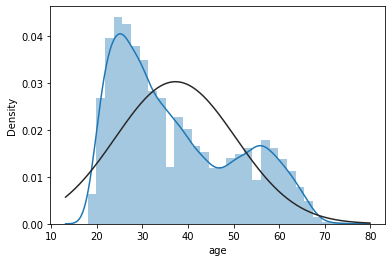

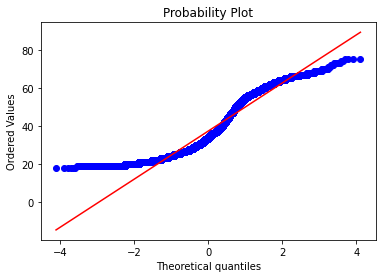

In [30]:
sns.distplot(df.age, fit=norm, bins = 30);
fig = plt.figure();
res = stats.probplot(df.age, plot=plt);

После перебора различных методов нормализации и скалирования выбран `QuantileTransformer`, который дал лучший результат.

In [31]:
df_norm = pd.DataFrame(df['age'])
transform_feature = QuantileTransformer(output_distribution='normal')

df_norm['age_scaled'] = transform_feature.fit_transform(df_norm[['age']])

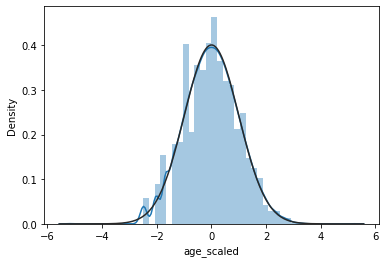

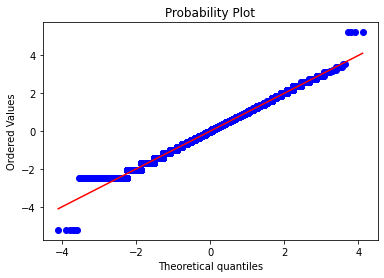

In [32]:
sns.distplot(df_norm['age_scaled'], fit=norm);
fig = plt.figure();
res = stats.probplot(df_norm['age_scaled'], plot=plt);

Применим тест `normaltest` (from scipy.stats) для проверки нормальности распределения переменной `age` после применения `QuantileTransformer`. 

In [33]:
_, transformed_p = normaltest(df_norm['age_scaled'])
print('Значение p = %.3f' % (transformed_p))

Значение p = 0.049


Распределение соответствует нормальному, если значение p > 0.05. Условие согласно тесту не соблюдается, визуально распределение практически нормальное.

In [34]:
X_train['age_scaled'] = transform_feature.fit_transform(X_train[['age']])
X_test['age_scaled'] = transform_feature.fit_transform(X_test[['age']])

In [35]:
del X_train['age'], X_test['age']

##### Дамми-кодирование

In [36]:
X_train_catdummy = pd.get_dummies(X_train[cat_columns])
X_test_catdummy = pd.get_dummies(X_test[cat_columns])

In [37]:
X_train_dummy = pd.concat((X_train['age_scaled'], X_train_catdummy), axis=1)
X_test_dummy = pd.concat((X_test['age_scaled'], X_test_catdummy), axis=1)

##### BackwardDifferenceEncoder

In [38]:
encoder = ce.BackwardDifferenceEncoder()

X_train_bde = encoder.fit_transform(X_train[cat_columns])
X_test_bde = encoder.fit_transform(X_test[cat_columns])

In [39]:
X_train_BDE = pd.concat((X_train['age_scaled'], X_train_bde), axis=1)
X_test_BDE = pd.concat((X_test['age_scaled'], X_test_bde), axis=1)

### Моделирование

#### RandomForest

In [40]:
forest = RandomForestClassifier(n_estimators=1000, max_depth=17, 
                                random_state=2020, n_jobs=-1)

In [41]:
# Dummy
forest.fit(X_train_dummy, y_train)

print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, forest.predict_proba(X_train_dummy)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, forest.predict_proba(X_test_dummy)[:, 1])))

RandomForestClassifier(max_depth=17, n_estimators=1000, n_jobs=-1,
                       random_state=2020)

AUC на обучающей выборке: 0.992
AUC на контрольной выборке: 0.842


In [40]:
# BackwardDifferenceEncoder
forest.fit(X_train_BDE, y_train)

print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, forest.predict_proba(X_train_BDE)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, forest.predict_proba(X_test_BDE)[:, 1])))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=2020, verbose=0,
                       warm_start=False)

AUC на обучающей выборке: 0.997
AUC на контрольной выборке: 0.817


#### GradientBoostingClassifier

In [44]:
gbt = GradientBoostingClassifier(n_estimators=800, random_state=42)

# Dummy
gbt.fit(X_train_dummy, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, gbt.predict_proba(X_train_dummy)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, gbt.predict_proba(X_test_dummy)[:, 1])))

AUC на обучающей выборке: 0.878
AUC на контрольной выборке: 0.849


In [46]:
# BackwardDifferenceEncoder
gbt.fit(X_train_BDE, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
print('AUC на обучающей выборке: {:.3f}'.
      format(roc_auc_score(y_train, gbt.predict_proba(X_train_BDE)[:, 1])))
print('AUC на контрольной выборке: {:.3f}'.
      format(roc_auc_score(y_test, gbt.predict_proba(X_test_BDE)[:, 1])))

AUC на обучающей выборке: 0.874
AUC на контрольной выборке: 0.822


### Оценка важности предикторов

In [40]:
# по примеру у Романа Николаевича - оценка важности предикторов
feature_names = X_train_dummy.columns
# cоздаем объект со значениями важностей, вычисленными моделью forest
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем 
# названия предикторов важностям
indices = np.argsort(importances)[::-1]

print("Важность предикторов:")
for f, idx in enumerate(indices):
    print("{:2d}. '{:5s}' ({:.4f})".format(f + 1,
                                           feature_names[idx],
                                           importances[idx]))

Важность предикторов:
 1. 'age_scaled' (0.1398)
 2. 'quarter_4' (0.1386)
 3. 'month_12' (0.0776)
 4. 'month_11' (0.0397)
 5. 'quarter_2' (0.0320)
 6. 'quarter_1' (0.0242)
 7. 'region_Кемеровская область север' (0.0188)
 8. 'month_10' (0.0167)
 9. 'credits_Да' (0.0161)
10. 'credits_Нет' (0.0158)
11. 'weekday_0' (0.0149)
12. 'regclient_Да' (0.0148)
13. 'housing_Собственное' (0.0148)
14. 'quarter_3' (0.0147)
15. 'regclient_Нет' (0.0147)
16. 'marstatus_Гражданский брак/женат/замужем' (0.0144)
17. 'gender_Женский' (0.0143)
18. 'weekday_4' (0.0142)
19. 'gender_Мужской' (0.0142)
20. 'weekday_2' (0.0141)
21. 'weekday_1' (0.0140)
22. 'auto_Нет' (0.0139)
23. 'region_Кемеровская область юг' (0.0139)
24. 'weekday_3' (0.0136)
25. 'marstatus_Холост' (0.0136)
26. 'children_Да' (0.0134)
27. 'children_Нет' (0.0134)
28. 'weekday_5' (0.0127)
29. 'jobtype_Пропуск поля' (0.0125)
30. 'jobtype_Официальное' (0.0119)
31. 'auto_Пропуск поля' (0.0118)
32. 'month_3' (0.0115)
33. 'month_4' (0.0115)
34. 'region_Нов

График значимости для первых 20 признаков:

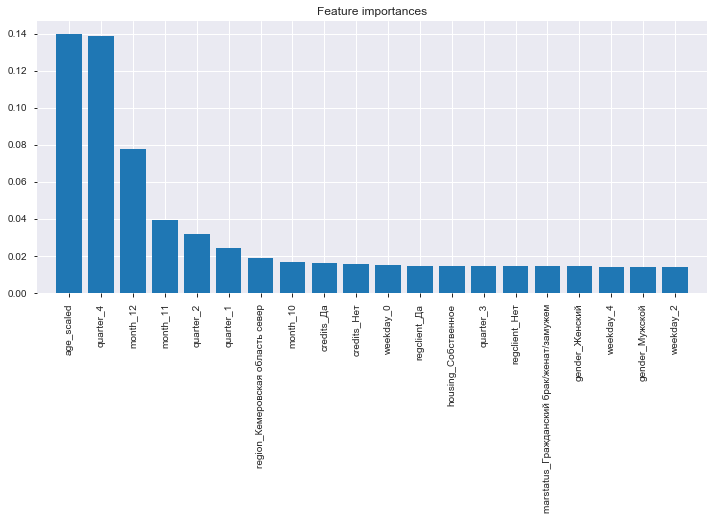

In [41]:
d_first = 20
plt.figure(figsize=(12, 5))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

### Выводы

1. Лучший результат показала модель GradientBoostingClassifier после дамми-кодирования категориальных переменных, AUC на контрольной выборке: 0.849.
2. Использование меньшего количества предикторов (например, 20 наиболее значимых) не привело к улучшению результатов моделей.